# Airbnb Project


## Questions
1. Are disributions of price in Seattle and Boston different? 
2. What's the difference in price between different property type? 
3. Can we use selected variable to predict price?

## Load packages

In [257]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read in the data

In [258]:
Boston_listing = pd.read_csv("./data/boston/listings.csv")
Seattle_listing = pd.read_csv("./data/seattle/listings.csv")

In [259]:
Boston_listing.shape

(3585, 95)

In [260]:
Seattle_listing.shape

(3818, 92)

In [261]:
Boston_listing["city"] = "Boston"
Seattle_listing["city"] = "Seattle"

## Merge two datasets

In [262]:
data = pd.concat([Boston_listing, Seattle_listing], join="inner")

In [263]:
data.shape

(7403, 92)

## Select variables of interest

In [264]:
interest_vars = ["host_location", "host_response_time", "host_response_rate", "host_acceptance_rate", 
                "host_listings_count", "property_type", "room_type", "accommodates", "bathrooms",
                "bedrooms", "beds", "bed_type", "square_feet", "price", "weekly_price", "monthly_price", 
                 "security_deposit", "cleaning_fee", "guests_included", "extra_people", "cancellation_policy",
                "review_scores_rating", "city"]

In [265]:
data_select = data[interest_vars]

## Drop variables contained too many NA

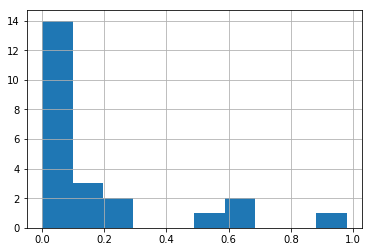

In [266]:
null_num = data_select.isnull().mean()
null_num.hist()

In [267]:
drop_list = null_num[null_num >= 0.2]

In [268]:
drop_list.index.tolist()

['square_feet',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee']

In [269]:
data_select = data_select.drop(drop_list.index, axis=1)

In [270]:
data_select.columns

Index(['host_location', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_listings_count', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'price', 'guests_included', 'extra_people',
       'cancellation_policy', 'review_scores_rating', 'city'],
      dtype='object')

In [271]:
data_select.shape

(7403, 18)

## Clean the data

In [272]:
data_select.price.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
data_select.price = data_select.price.apply(pd.to_numeric) / 100

## Q1
### Are disributions of price in Seattle and Boston different?

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a18282d30>,
      dtype=object)

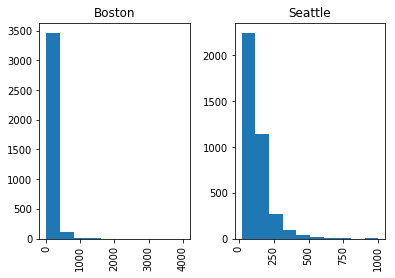

In [273]:
data_select.price.hist(by = data_select["city"])

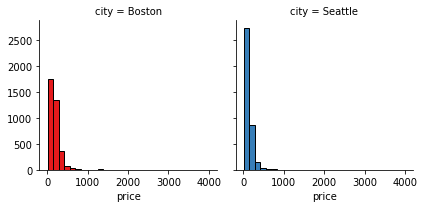

In [274]:
g = sns.FacetGrid(data_select, col="city", hue="city", palette="Set1", col_wrap=2)
bins=np.linspace(data_select.price.min(), data_select.price.max(), 30)
g.map(plt.hist, 'price', bins=bins, ec="k");

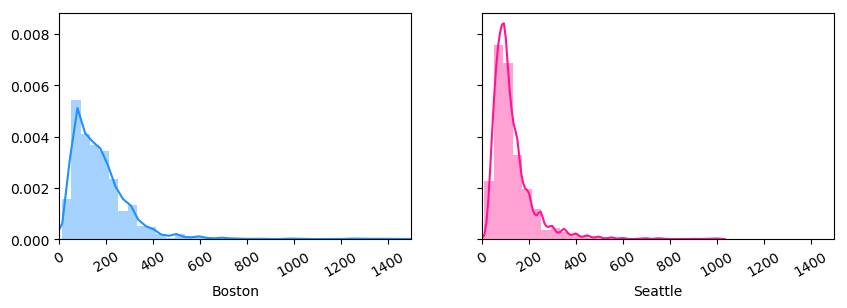

In [276]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3), sharey=True, dpi=100)
x1 = data_select.loc[data_select.city=='Boston', ['price']]
x2 = data_select.loc[data_select.city=='Seattle', ['price']]
bins=np.linspace(data_select.price.min(), data_select.price.max(), 100)
sns.distplot(x1 , color="dodgerblue", ax=axes[0],bins = bins, axlabel='Boston')
axes[0].set_xlim([0, 1500]);
sns.distplot(x2 , color="deeppink", ax=axes[1],bins = bins, axlabel='Seattle')
axes[1].set_xlim([0, 1500]);
for tick in axes[0].get_xticklabels():
    tick.set_rotation(30)
for tick in axes[1].get_xticklabels():
    tick.set_rotation(30)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


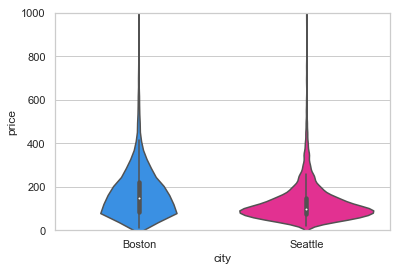

In [303]:
sns.set_style("whitegrid")
my_pal = {"Boston": "dodgerblue", "Seattle": "deeppink"}
ax = sns.violinplot(x="city", y="price", data=data_select, palette=my_pal)
ax.set_ylim([0, 1000]);

In [277]:
aggregation = {"price":{"N": "count",
                        "min": "min",
                        "max": "max",
                       "mean": "mean",
                       "median": "median"}
              }
table = pd.DataFrame(data_select.groupby("city").agg(aggregation)).round(2)
table

/anaconda3/lib/python3.7/site-packages/pandas/core/groupby/groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


price                             
            N   min     max    mean median
city                                      
Boston   3585  10.0  4000.0  173.93  150.0
Seattle  3818  20.0  1000.0  127.98  100.0